In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model as lm

In [56]:
data = pd.read_csv(r"C:\Users\Nemanja.Antic\Desktop\iSpotABot\cresciFullPreProcessed.csv")

In [57]:
data.replace([np.inf, -np.inf], np.nan)
data = data.drop(data.columns[[0, 1]], axis=1)
data = data.dropna(axis=0, how='any')
data = data.drop('id', axis=1)
data = data.round(4)
data = data.drop(data[data.friends_to_followers_ratio > np.finfo(np.float64).max].index)

In [58]:
y = data['is_bot'].values
data = data.drop('is_bot',axis=1)
x = data.values

In [59]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, train_size = 0.67, test_size=0.33, stratify = y, random_state = 7)

In [60]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size = 0.8, test_size = 0.2, stratify = y_train_validation, random_state = 7)

In [61]:
scaler_tv = preprocessing.StandardScaler()
scaler_tv.fit(x_train)
x_train = scaler_tv.transform(x_train)
x_validation = scaler_tv.transform(x_validation)

In [62]:
scaler_tt = preprocessing.StandardScaler()
scaler_tt.fit(x_train_validation)
x_train_validation = scaler_tt.transform(x_train_validation)
x_test = scaler_tt.transform(x_test)

In [63]:
params = {'C': [0.1, 1.1, 2.1 ,3.1, 4.1]}
grid = model_selection.GridSearchCV(lm.LogisticRegression(penalty='l2', class_weight='balanced') , param_grid=params , scoring='accuracy')
grid.fit(x_train, y_train)
best_kernel_model = grid.best_estimator_
best_kernel_model.fit(x_train, y_train)

LogisticRegression(C=3.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_train_predicted = best_kernel_model.predict(x_train_validation)
y_test_predicted = best_kernel_model.predict(x_test)

best_kernel_model_train_score = metrics.accuracy_score(y_train_validation, y_train_predicted)
best_kernel_model_test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [65]:
score = model_selection.cross_val_score(best_kernel_model,x,y, scoring='accuracy')

In [66]:
best_kernel_model_test_score

0.9676814011676397

In [67]:
best_kernel_model_train_score

0.967238369107528

In [68]:
best_kernel_model.coef_.ravel()

array([-2.52462025,  9.66225641, -0.03947261, -0.23473965,  0.75264012,
       12.0463684 , -1.35484174, -1.8776416 , -1.86513569, -0.22705481])

In [69]:
len(data.columns)

10

In [70]:
score.mean()

0.932633635545284

In [71]:
score

array([0.96800826, 0.98203964, 0.84785301])

([<matplotlib.axis.XTick at 0x200a735fc18>,
 <a list of 10 Text xticklabel objects>)

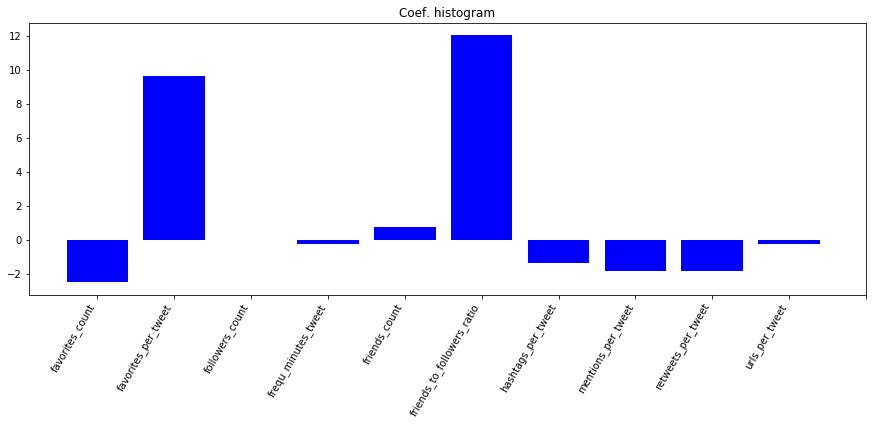

In [72]:
plt.figure(figsize=(15, 5))
plt.title("Coef. histogram")
plt.bar(np.arange(10), best_kernel_model.coef_.ravel(), color='blue')
feature_names = np.array(data.columns)
plt.xticks(np.arange(0, 11), feature_names, rotation=60, ha="right")

In [75]:
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(best_kernel_model, open(filename, 'wb'))